In [35]:
#Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np

In [36]:
#Working directory
os.chdir('/Users/khangphamgia/Downloads/2008-16Clean')
#Load data
df = pd.read_excel('/Users/khangphamgia/Downloads/2008-16Clean/pivot_df.xlsx')
df = df.sort_values(['timeid'], ascending=True)
print(df.head())

      Province  District  Commune  Household_ID  timeid  Access_Internet  \
0          105         1       17             1    2010              3.0   
3260       217        19       25            16    2010              5.0   
3264       217        19       25            17    2010              5.0   
3268       217        19       25            18    2010              1.0   
7516       801         5       17             3    2010              1.0   

      Access_Service  Annual_Income  COCC  Disaster  Family_Size  \
0                2.0         245800     2         2            6   
3260             1.0         119442     2         2            6   
3264             2.0          68780     2         2            5   
3268             2.0          66210     2         2            6   
7516             1.0         175260     2         2            5   

      Food_Consumption  Have_Insurance  Interest_Purchasing  Loan_Rejected  \
0            7001923.0               1                 9

In [37]:
print(df['Plot_Investment_Dummy'].value_counts())

Plot_Investment_Dummy
2.0    837
1.0    357
Name: count, dtype: int64


In [38]:
#Transform variables
#Divide annual income by 12
df['Annual_Income'] = df['Annual_Income'] / 12
#In the 'Disaster' column, relace the value 2 with 0
df['Disaster'] = df['Disaster'].replace(2, 0)
#In the 'Have_Insurance' column, relace the value 2 with 0
df['Have_Insurance'] = df['Have_Insurance'].replace(2, 0)
#In the 'Access_Service' column, relace the value 2 with 0
df['Access_Service'] = df['Access_Service'].replace(2, 0)
#In the 'COCC' column, relace the value 2 with 0
df['COCC'] = df['COCC'].replace(2, 0)
#In the 'Plot_Investment_Dummy' column, relace the value 2 and NaN with 0 
df['Plot_Investment_Dummy'] = df['Plot_Investment_Dummy'].replace([2, np.nan], 0)

In [39]:
#Summary statistics of several variables 
print(df[["Annual_Income", "Disaster", "Have_Insurance", "Loan_Rejected", "Food_Consumption"]].describe())


       Annual_Income     Disaster  Have_Insurance  Loan_Rejected  \
count    8336.000000  8336.000000     8336.000000    8183.000000   
mean     8100.619202     0.464012        0.904031       0.221435   
std     10726.714876     0.498733        0.294567       4.341744   
min    -31750.000000     0.000000        0.000000       0.000000   
25%      3083.020833     0.000000        1.000000       0.000000   
50%      5535.416667     0.000000        1.000000       0.000000   
75%      9683.458333     1.000000        1.000000       0.000000   
max    225930.000000     1.000000        1.000000      98.000000   

       Food_Consumption  
count      8.305000e+03  
mean       3.510295e+06  
std        3.963874e+06  
min        2.000000e+01  
25%        8.300000e+02  
50%        3.420000e+03  
75%        7.001033e+06  
max        1.399999e+07  


**Distribution of having insurance**

In [40]:
#Check for distribution of have insurance
print(df['Have_Insurance'].value_counts())

Have_Insurance
1    7536
0     800
Name: count, dtype: int64


**Check for liquidity Constraint**

In [41]:
#Value counts and frequency of the column Loan_Rejected by each year
df = df[df['Loan_Rejected'] != 98]
print(df.groupby('timeid')['Loan_Rejected'].value_counts(normalize=True))

timeid  Loan_Rejected
2010    0.0              0.983301
        1.0              0.006385
        2.0              0.004912
        3.0              0.002456
        4.0              0.000982
        10.0             0.000982
        5.0              0.000982
2012    0.0              0.987355
        2.0              0.006576
        1.0              0.004047
        3.0              0.001012
        5.0              0.000506
        4.0              0.000506
2014    0.0              0.988406
        1.0              0.003382
        3.0              0.002415
        5.0              0.002415
        7.0              0.000966
        2.0              0.000966
        4.0              0.000966
        10.0             0.000483
2016    0.0              0.993282
        1.0              0.002879
        2.0              0.002399
        3.0              0.000960
        4.0              0.000480
Name: proportion, dtype: float64


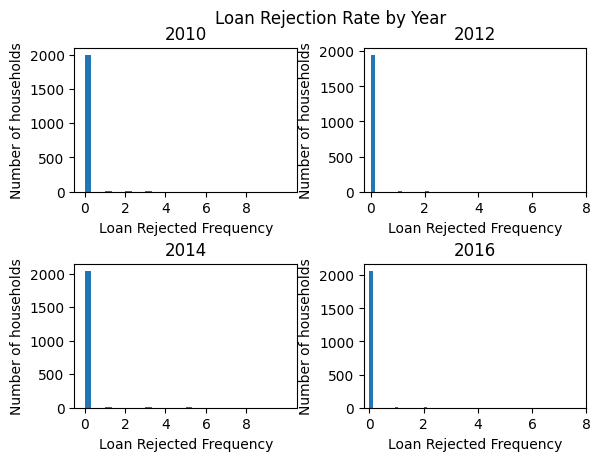

In [42]:
df.hist(column='Loan_Rejected', by='timeid', bins=30)
for ax in plt.gcf().axes:
    ax.set_xticks(np.arange(0, 10, step=2))
    ax.set_xticklabels(np.arange(0, 10, step=2), rotation=0)
#Add title and labels for x and y axis to every subplot
plt.suptitle('Loan Rejection Rate by Year')
for ax in plt.gcf().axes:
    ax.set_xlabel('Loan Rejected Frequency')
    ax.set_ylabel('Number of households')



**Test for Perfect Risk Sharing**

In [43]:
#Log consumption and log aggregate consumption
df['logc'] = np.log(df['Food_Consumption'])
df['cbar'] = df.groupby(['Province','timeid'])['Food_Consumption'].transform('mean') #Average food consumption across provinces in each year
df['logcbar'] = np.log(df['cbar'])

#Consumption growth 
df['dlogc'] = df['logc'].diff()
df['dlogcbar'] = df['logcbar'].diff()

#Log income and income growth 
df['logy'] = np.log(df['Annual_Income'])
df['dlogy'] = df['logy'].diff()

#D(logc - logcbar)
df['logc-logcbar'] = df['logc'] - df['logcbar']
df['D(logc-logcbar)'] = df['logc-logcbar'].diff()

/Users/khangphamgia/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/khangphamgia/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
df[['dlogc', 'dlogcbar', 'dlogy']].describe()

,dlogc,dlogcbar,dlogy
count,8258.000000,8319.000000,8285.000000
mean,-0.000812,-0.001090,NaN
std,1.022866,0.175622,NaN
min,-8.848385,-8.770224,-inf
25%,-0.433610,-0.012596,-0.788465
50%,0.000007,0.000000,-0.008191
75%,0.434141,0.012596,0.776634
max,9.100134,0.567786,inf


**Base Model**

$$
\Delta \ln c_{it} = \beta \Delta \ln c_t + \delta \Delta \ln y_{it} + u_{it}
$$


In [45]:
# Specify the independent and dependent variables
# Drop NA values of the variables
df = df.dropna(subset=['dlogc', 'dlogcbar', 'dlogy'])
# Replace infinite values with NaN, then drop those rows
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['dlogc', 'dlogcbar', 'dlogy'])
result_1 = sm.ols(formula="dlogc ~ dlogcbar + dlogy - 1",
                   data=df).fit()

print(result_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  dlogc   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.040
Method:                 Least Squares   F-statistic:                              173.1
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                    2.32e-74
Time:                        21:23:57   Log-Likelihood:                         -11684.
No. Observations:                8220   AIC:                                  2.337e+04
Df Residuals:                    8218   BIC:                                  2.339e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Add Insurance and Disaster, Dummy Variables for Time and Province**

In [46]:
#Calculate overall average value for each variable
df['Disaster_bar'] = df['Disaster'].mean()
df['Demean_Disaster'] = df['Disaster'] - df['Disaster_bar']
df['Have_Insurance_bar'] = df['Have_Insurance'].mean()
df['Demean_Insurance'] = df['Have_Insurance'] - df['Have_Insurance_bar']
df["dlogy_bar"] = df['dlogy'].mean()
df["Demean_Income"] = df['dlogy'] - df['dlogy_bar']
df["dlogcbar_bar"] = df['dlogcbar'].mean()
df["Demean_Agg_Con"] = df['dlogcbar'] - df['dlogcbar_bar']
#Add interaction terms
df['Disaster*Insurance'] = df['Disaster_bar'] * df['Demean_Insurance']
df['Income*Insurance'] =  df['Demean_Income'] * df['Demean_Insurance']
df['Agg_Con*Insurance'] = df['Demean_Agg_Con'] * df['Demean_Insurance']
df['Insurance*dlogy'] = df['Demean_Insurance'] * df['Demean_Income']
df['Insurance*dlogcbar'] = df['Demean_Insurance'] * df['Demean_Agg_Con']

In [47]:
df['Province'].value_counts()

Province
105    1807
217    1164
503    1079
801     985
403     733
605     496
301     384
606     372
302     360
205     324
511     280
607     236
Name: count, dtype: int64

In [48]:
print(df)

      Province  District  Commune  Household_ID  timeid  Access_Internet  \
3260       217        19       25            16    2010              5.0   
3264       217        19       25            17    2010              5.0   
3268       217        19       25            18    2010              1.0   
7516       801         5       17             3    2010              1.0   
3272       217        19       25            19    2010              1.0   
...        ...       ...      ...           ...     ...              ...   
4463       403        23       59             1    2016              5.0   
4467       403        23       59             2    2016              1.0   
4471       403        23       59             3    2016              5.0   
4999       503         7       32             5    2016              5.0   
8335       801        27       29             2    2016              3.0   

      Access_Service  Annual_Income  COCC  Disaster  ...  Demean_Insurance  \
3260     

In [49]:
print(df['timeid'])

3260    2010
3264    2010
3268    2010
7516    2010
3272    2010
        ... 
4463    2016
4467    2016
4471    2016
4999    2016
8335    2016
Name: timeid, Length: 8220, dtype: int64


In [50]:
df['timeid'].value_counts()

timeid
2012    2068
2010    2057
2016    2049
2014    2046
Name: count, dtype: int64

In [51]:
# Use pandas dummy function to create a set of dummies based on the categories we have in Province, and timeid
df_dummy = pd.get_dummies(df, columns=['Province', 'timeid'])
print(df_dummy.head())

      District  Commune  Household_ID  Access_Internet  Access_Service  \
3260        19       25            16              5.0             1.0   
3264        19       25            17              5.0             0.0   
3268        19       25            18              1.0             0.0   
7516         5       17             3              1.0             1.0   
3272        19       25            19              1.0             0.0   

      Annual_Income  COCC  Disaster  Family_Size  Food_Consumption  ...  \
3260    9953.500000     0         0            6         4001704.0  ...   
3264    5731.666667     0         0            5        11000269.0  ...   
3268    5517.500000     0         0            6         8000702.0  ...   
7516   14605.000000     0         0            5         5002325.0  ...   
3272   11935.833333     0         1            2         5001305.0  ...   

      Province_503  Province_511  Province_605  Province_606  Province_607  \
3260         False        

$$
\Delta (\ln c_{it} - \ln c_t) = \delta \Delta \ln y_{it} + \beta_2 \text{Insurance}_t + \beta_3 \text{Disaster}_t 
+ \beta_4 \widetilde{\text{Insurance}}_t \times \widetilde{\text{Disaster}}_t 
+ \beta_5 \widetilde{\text{Insurance}}_t \times \widetilde{\Delta \ln y_{it}} 
+ \beta_6 \widetilde{\text{Insurance}}_t \times \widetilde{\Delta \ln c_t} 
+ \beta_i \text{Province}_i + \beta_t \text{Time}_t + u_{it}
$$


In [52]:
import statsmodels.api as sm
X = df_dummy[['dlogy', 
              'Disaster', 'Have_Insurance',
              #'Insurance*dlogy', 
              #'Insurance*dlogcbar',
              #'Income*Insurance',
              'Disaster*Insurance', 'Income*Insurance', 'Agg_Con*Insurance',
              'Province_217', 'Province_503', 'Province_801', 'Province_403',
              'Province_605', 'Province_301', 'Province_606', 'Province_302',
              'Province_205', 'Province_511', 'Province_607',
              'timeid_2010', 'timeid_2012', 'timeid_2014']]
Y = df_dummy['D(logc-logcbar)']

In [53]:
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)


/var/folders/7r/8c1w5fhs5xb1m8c809vwl4n80000gn/T/ipykernel_61305/635440727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[bool_columns] = X[bool_columns].astype(int)


In [54]:
result_5 = sm.OLS(endog = Y, exog = X).fit()
robust_result_5 = result_5.get_robustcov_results(cov_type='HC3')  # Use HC3 for robust errors
print(robust_result_5.summary())

                            OLS Regression Results                            
Dep. Variable:        D(logc-logcbar)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                nan
Time:                        21:23:58   Log-Likelihood:                -11680.
No. Observations:                8220   AIC:                         2.340e+04
Df Residuals:                    8200   BIC:                         2.354e+04
Df Model:                          19                                         
Covariance Type:                  HC3                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dlogy                  0.0610      0

$$
\Delta \ln c_{it} = \beta_1 \Delta \ln c_t + \delta \Delta \ln y_{it} + \beta_2 \text{Disaster}_t + \beta_i \text{Province}_i + \beta_t \text{Time}_t + u_{it}
$$


In [55]:
X2 = df_dummy[['dlogy', 'dlogcbar',
              'Disaster', 
              #'Insurance*dlogy', 
              #'Insurance*dlogcbar',
              'Province_217', 'Province_503', 'Province_801', 'Province_403',
              'Province_605', 'Province_301', 'Province_606', 'Province_302',
              'Province_205', 'Province_511', 'Province_607',
              'timeid_2010', 'timeid_2012', 'timeid_2014']]
Y2 = df_dummy['dlogc']
bool_columns = X2.select_dtypes(include=['bool']).columns
X2[bool_columns] = X2[bool_columns].astype(int)

/var/folders/7r/8c1w5fhs5xb1m8c809vwl4n80000gn/T/ipykernel_61305/2230807333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[bool_columns] = X2[bool_columns].astype(int)


In [56]:
result_2 = sm.OLS(endog = Y2, exog = X2).fit()
robust_result_2 = result_2.get_robustcov_results(cov_type='HC3')  # Use HC3 for robust errors
print(robust_result_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  dlogc   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.040
Method:                 Least Squares   F-statistic:                              14.28
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                    2.92e-41
Time:                        21:23:59   Log-Likelihood:                         -11680.
No. Observations:                8220   AIC:                                  2.339e+04
Df Residuals:                    8203   BIC:                                  2.351e+04
Df Model:                          17                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

$$
\Delta \ln c_{it} = \beta_1 \Delta \ln c_t + \delta \Delta \ln y_{it} + \beta_2 \text{Insurance}_t + \beta_i \text{Province}_i + \beta_t \text{Time}_t + u_{it}
$$


In [57]:
X3 = df_dummy[['dlogy', 'dlogcbar',
              'Have_Insurance', 
              'Insurance*dlogy', 
              'Insurance*dlogcbar',
              'Province_217', 'Province_503', 'Province_801', 'Province_403',
              'Province_605', 'Province_301', 'Province_606', 'Province_302',
              'Province_205', 'Province_511', 'Province_607',
              'timeid_2010', 'timeid_2012', 'timeid_2014']]
Y3 = df_dummy['dlogc']
bool_columns = X3.select_dtypes(include=['bool']).columns
X3[bool_columns] = X3[bool_columns].astype(int)

/var/folders/7r/8c1w5fhs5xb1m8c809vwl4n80000gn/T/ipykernel_61305/587725986.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3[bool_columns] = X3[bool_columns].astype(int)


In [58]:
result_3 = sm.OLS(endog = Y3, exog = X3).fit()
robust_result_3 = result_3.get_robustcov_results(cov_type='HC3')  # Use HC3 for robust errors
print(robust_result_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  dlogc   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              12.38
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                    1.24e-38
Time:                        21:23:59   Log-Likelihood:                         -11680.
No. Observations:                8220   AIC:                                  2.340e+04
Df Residuals:                    8201   BIC:                                  2.353e+04
Df Model:                          19                                                  
Covariance Type:                  HC3                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

$$
\Delta \ln c_{it} = \beta_1 \Delta \ln c_t + \delta \Delta \ln y_{it} + \beta_2 \text{Insurance}_t + \beta_3 \text{Disaster}_t + \beta_4 \widetilde{\text{Insurance}}_t \times \widetilde{\text{Disaster}}_t 
+ \beta_5 \widetilde{\text{Insurance}}_t \times \widetilde{\Delta \ln y_{it}} 
+ \beta_6 \widetilde{\text{Insurance}}_t \times \widetilde{\Delta \ln c_t} 
+ \beta_i \text{Province}_i + \beta_t \text{Time}_t + u_{it}
$$


In [59]:
X4 = df_dummy[['dlogy', 'dlogcbar',
              'Disaster', 'Have_Insurance',
              #'Insurance*dlogy', 
              #'Insurance*dlogcbar',
              'Disaster*Insurance', 'Income*Insurance', 'Agg_Con*Insurance',
              'Province_217', 'Province_503', 'Province_801', 'Province_403',
              'Province_605', 'Province_301', 'Province_606', 'Province_302',
              'Province_205', 'Province_511', 'Province_607',
              'timeid_2010', 'timeid_2012', 'timeid_2014']]
Y4 = df_dummy['dlogc']
bool_columns = X4.select_dtypes(include=['bool']).columns
X4[bool_columns] = X4[bool_columns].astype(int)

/var/folders/7r/8c1w5fhs5xb1m8c809vwl4n80000gn/T/ipykernel_61305/1002398340.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4[bool_columns] = X4[bool_columns].astype(int)


In [60]:
result_4 = sm.OLS(endog = Y4, exog = X4).fit()
robust_result_4 = result_4.get_robustcov_results(cov_type='HC3')  # Use HC3 for robust errors
print(robust_result_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  dlogc   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                nan
Time:                        21:24:01   Log-Likelihood:                -11679.
No. Observations:                8220   AIC:                         2.340e+04
Df Residuals:                    8199   BIC:                         2.355e+04
Df Model:                          20                                         
Covariance Type:                  HC3                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dlogy                  0.0608      0

In [61]:
from statsmodels.iolib.summary2 import summary_col

results_table = summary_col(
    [result_1, result_2, result_3, result_4],
    stars=True,  # Add significance stars
    model_names=["Model 1", "Model 2", "Model 3", "Model 4"],
    info_dict={"R-squared": lambda x: f"{x.rsquared:.2f}", 
               "No. observations": lambda x: f"{int(x.nobs)}"}
)

# Drop duplicate labels before reindexing
results_table.tables[0] = results_table.tables[0][~results_table.tables[0].index.duplicated(keep='first')]

# Reorder the rows to display dlogcbar, dlogy, Disaster, and Have_Insurance upfront
custom_order = ['dlogcbar', 'dlogy', 'Disaster', 'Have_Insurance', 'Disaster*Insurance', 'Agg_Con*Insurance', 'Income*Insurance'] + \
               [item for item in results_table.tables[0].index if item not in ['dlogcbar', 'dlogy', 'Disaster', 'Have_Insurance']]

results_table.tables[0] = results_table.tables[0].reindex(custom_order)

print(results_table)
#save the table to a latex file
with open('results_table.tex', 'w') as file:
    file.write(results_table.as_latex())


                    Model 1   Model 2   Model 3   Model 4 
----------------------------------------------------------
dlogcbar           1.0931*** 1.0885*** 1.0793*** 1.0775***
dlogy              0.0575*** 0.0608*** 0.0608*** 0.0608***
Disaster                     -0.0213             -0.0359  
Have_Insurance                         -0.0068   0.0328   
Disaster*Insurance                               -0.0870  
Agg_Con*Insurance                                0.1294   
Income*Insurance                                 0.0107   
Agg_Con*Insurance                                0.1294   
                                                 (0.3106) 
Disaster*Insurance                               -0.0870  
Income*Insurance                                 0.0107   
Insurance*dlogcbar                     0.1210             
Insurance*dlogy                        0.0106             
Province_205                 0.0665    0.0560    0.0593   
Province_217                 0.0330    0.0240    0.0229

In [62]:
results_table_2 = summary_col(
    [result_5],
    stars=True,  # Add significance stars
    model_names=["Model 5"],
    info_dict={"R-squared": lambda x: f"{x.rsquared:.2f}", 
               "No. observations": lambda x: f"{int(x.nobs)}"}
)
print(results_table_2)
#save the table to a latex file
with open('results_table.tex', 'w') as file:
    file.write(results_table.as_latex())


                    Model 5 
----------------------------
dlogy              0.0610***
                   (0.0092) 
Disaster           -0.0365  
                   (0.0292) 
Have_Insurance     0.0367   
                   (0.0458) 
Disaster*Insurance -0.0977  
                   (0.1245) 
Income*Insurance   0.0110   
                   (0.0306) 
Agg_Con*Insurance  0.2174   
                   (0.3010) 
Province_217       0.0182   
                   (0.0378) 
Province_503       0.0201   
                   (0.0390) 
Province_801       -0.0527  
                   (0.0399) 
Province_403       0.0401   
                   (0.0444) 
Province_605       -0.0698  
                   (0.0511) 
Province_301       0.0375   
                   (0.0568) 
Province_606       -0.0187  
                   (0.0574) 
Province_302       0.0099   
                   (0.0582) 
Province_205       0.0613   
                   (0.0608) 
Province_511       0.0082   
                   (0.0645) 
Province_607 